# Importing Packages

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import mean_squared_error

# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ACF and PACF functions
import statsmodels.graphics.tsaplots as sgt

# Helper Functions

In [2]:
def plot_acf_pacf(series: pd.Series):
    """
    Plot ACF and PACF functions
    
    INPUTS:
        :series (pd.Sereies): Input Time series.
    
    OUTPUTS:
        :(None): No output returned
    """
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sgt.plot_acf(series, lags=40, ax=ax[0])
    sgt.plot_pacf(series, lags=40, ax=ax[1], method='ywm')
    plt.show()

In [3]:
def arima_modeling(df: pd.DataFrame, company_name: str):
    """
    Produces an ARIMA fit for the input dataframe
    
    INPUTS:
        :df (pd.DataFrame): Input dataframe.
        :company_name (str): Company name
    """
    # Train test split
    train = df.loc[:"2021-10-29", :]
    test = df.loc["2021-10-29":, :]
    
    # Model
    y = train["Adj_Close"]
    X = train.iloc[:, 1:]
    model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5), exog=X, freq="B")
    model_fit = model.fit()
    
    # Forecasts
    forecast = model_fit.get_forecast(len(test.index), exog=test.iloc[:, 1:])
    forecast_df = forecast.conf_int(alpha = 0.05)
    forecast_df["Adj_Close"] = (forecast_df["lower Adj_Close"] + forecast_df["upper Adj_Close"])/2

    # Forecast Evaluation
    test_mse = mean_squared_error(y_true=test["Adj_Close"].to_numpy(), y_pred=forecast_df["Adj_Close"].to_numpy())
    test_rmse = np.sqrt(test_mse)
    print(f"Test RMSE: {round(test_rmse, 4)}")
    print("-"*30, end="\n\n")

    # Plotting forecasts
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(test["Adj_Close"].to_numpy(), label="Actual values")
    ax.plot(forecast_df["Adj_Close"].to_numpy(), label="Test predictions")
    ax.set_xlabel("Time", size=12)
    ax.set_ylabel("Stock Price", size=12)
    ax.set_ylim([train["Adj_Close"].min()-10, test["Adj_Close"].max()+10])
    ax.set_title(f"{company_name}: Actuals vs ARIMA Predictions", size=15)
    ax.grid()
    ax.legend()
    plt.show()

# ARIMA for each company

## Facebook

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56467D+01    |proj g|=  4.58028D+01

At iterate    5    f=  3.02668D+00    |proj g|=  2.00305D-01

At iterate   10    f=  2.76921D+00    |proj g|=  8.52754D-02

At iterate   15    f=  2.74652D+00    |proj g|=  2.32124D-02

At iterate   20    f=  2.74007D+00    |proj g|=  5.20131D-03

At iterate   25    f=  2.73680D+00    |proj g|=  5.01006D-03

At iterate   30    f=  2.73633D+00    |proj g|=  3.58733D-04

At iterate   35    f=  2.73627D+00    |proj g|=  6.62876D-05

At iterate   40    f=  2.73626D+00    |proj g|=  5.48278D-04

At iterate   45    f=  2.73624D+00    |proj g|=  1.26507D-04

At iterate   50    f=  2.73624D+00    |proj g|=  1.32944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 13.209
------------------------------



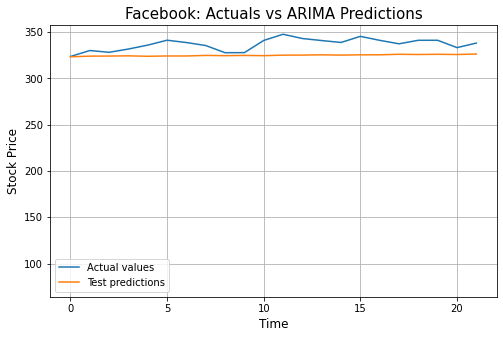

In [4]:
df = pd.read_csv("../Data/fb_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Facebook")

## Apple

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88667D+00    |proj g|=  7.83250D-02

At iterate    5    f=  2.77933D+00    |proj g|=  4.37148D-02

At iterate   10    f=  2.75920D+00    |proj g|=  2.16826D-02

At iterate   15    f=  2.75480D+00    |proj g|=  2.17513D-02

At iterate   20    f=  2.75305D+00    |proj g|=  2.16739D-03

At iterate   25    f=  2.75300D+00    |proj g|=  1.83558D-03

At iterate   30    f=  2.75299D+00    |proj g|=  6.77054D-04

At iterate   35    f=  2.75293D+00    |proj g|=  2.25826D-03

At iterate   40    f=  2.75287D+00    |proj g|=  1.79391D-03

At iterate   45    f=  2.75284D+00    |proj g|=  1.92669D-03


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.75283D+00    |proj g|=  7.71673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     55      1     0     0   7.717D-04   2.753D+00
  F =   2.7528277070551530     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 12.6204
------------------------------



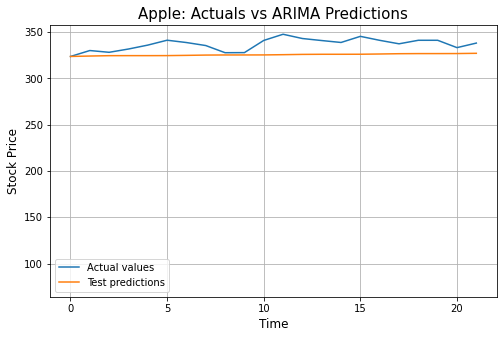

In [5]:
df = pd.read_csv("../Data/aapl_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Apple")

## Amazon

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89066D+00    |proj g|=  7.88003D-02

At iterate    5    f=  2.78072D+00    |proj g|=  2.48710D-02

At iterate   10    f=  2.75889D+00    |proj g|=  4.46462D-03

At iterate   15    f=  2.75399D+00    |proj g|=  5.73671D-03

At iterate   20    f=  2.75316D+00    |proj g|=  2.14958D-03

At iterate   25    f=  2.75308D+00    |proj g|=  5.63979D-04

At iterate   30    f=  2.75299D+00    |proj g|=  1.30644D-04

At iterate   35    f=  2.75297D+00    |proj g|=  2.41303D-03

At iterate   40    f=  2.75271D+00    |proj g|=  2.09908D-03

At iterate   45    f=  2.75269D+00    |proj g|=  1.48543D-04


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.75269D+00    |proj g|=  1.01462D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     54      1     0     0   1.015D-04   2.753D+00
  F =   2.7526914978901993     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 13.0385
------------------------------



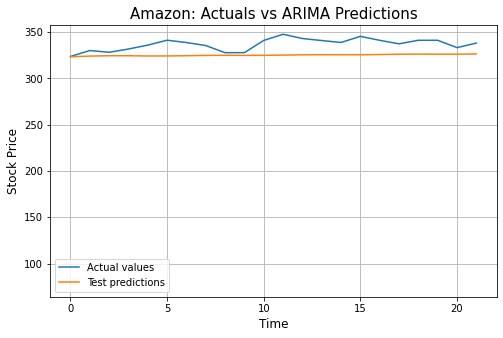

In [6]:
df = pd.read_csv("../Data/amzn_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Amazon")

## Netflix

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88972D+00    |proj g|=  7.74605D-02

At iterate    5    f=  2.78889D+00    |proj g|=  2.33126D-02

At iterate   10    f=  2.76479D+00    |proj g|=  1.02612D-02

At iterate   15    f=  2.76053D+00    |proj g|=  1.39043D-02

At iterate   20    f=  2.75945D+00    |proj g|=  1.07297D-03

At iterate   25    f=  2.75894D+00    |proj g|=  2.26556D-03

At iterate   30    f=  2.75803D+00    |proj g|=  4.25880D-03

At iterate   35    f=  2.75776D+00    |proj g|=  8.80289D-04

At iterate   40    f=  2.75775D+00    |proj g|=  8.93326D-04

At iterate   45    f=  2.75752D+00    |proj g|=  1.32675D-03


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.75747D+00    |proj g|=  3.95108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     56      1     0     0   3.951D-04   2.757D+00
  F =   2.7574670656302618     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 13.0081
------------------------------



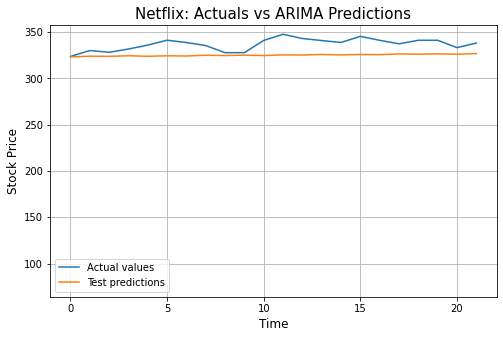

In [7]:
df = pd.read_csv("../Data/nflx_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Netflix")

## Google

/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88596D+00    |proj g|=  7.82951D-02

At iterate    5    f=  2.77536D+00    |proj g|=  3.84627D-02

At iterate   10    f=  2.75616D+00    |proj g|=  5.16545D-02

At iterate   15    f=  2.74749D+00    |proj g|=  6.96919D-03

At iterate   20    f=  2.74661D+00    |proj g|=  8.89764D-04

At iterate   25    f=  2.74654D+00    |proj g|=  3.30450D-03

At iterate   30    f=  2.74641D+00    |proj g|=  1.21458D-03

At iterate   35    f=  2.74639D+00    |proj g|=  6.24392D-04

At iterate   40    f=  2.74601D+00    |proj g|=  6.71942D-03

At iterate   45    f=  2.74586D+00    |proj g|=  1.74238D-04


/opt/anaconda3/envs/stock/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.74586D+00    |proj g|=  8.70957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     54      1     0     0   8.710D-04   2.746D+00
  F =   2.7458573124858265     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Test RMSE: 13.1846
------------------------------



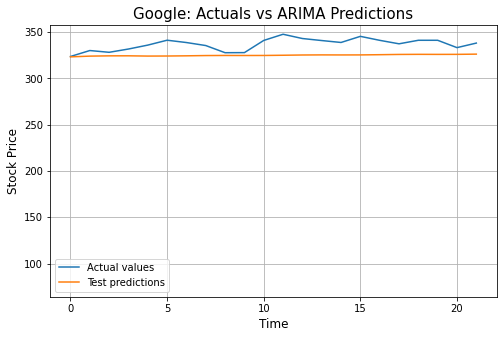

In [8]:
df = pd.read_csv("../Data/goog_sentiment_df.csv")
df.set_index(["Date"], inplace=True)
arima_modeling(df = df, company_name = "Google")